# Student Marks Prediction

In [42]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [43]:
df  = pd.read_csv('student_marks.csv')

In [44]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [45]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [47]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

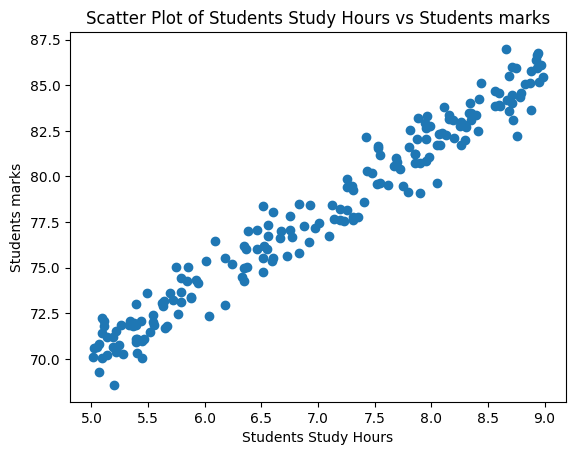

In [48]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [49]:
# Data Cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [50]:
df.study_hours.mean()

np.float64(6.9959487179487185)

In [79]:
df['study_hours'].fillna(df['study_hours'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9804\392308505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['study_hours'].fillna(df['study_hours'].mean(), inplace=True)


In [80]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [53]:
# split dataset

In [81]:
X = df.drop("student_marks", axis = "columns")
#X = df.study_hours
y = df.student_marks

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [83]:
X_train

,study_hours
112,6.920000
162,7.790000
77,6.560000
27,6.730000
12,7.750000
...,...
71,5.110000
170,5.190000
34,8.720000
196,8.560000


In [84]:
y_train

112    76.38
162    79.17
77     77.33
27     75.65
12     79.50
       ...  
71     71.79
170    71.18
34     83.08
196    84.68
31     76.14
Name: student_marks, Length: 160, dtype: float64

In [85]:
X_test

,study_hours
66,7.860000
43,8.300000
143,6.510000
161,7.300000
110,7.980000
67,8.260000
92,5.440000
19,7.670000
99,8.070000
47,5.010000


In [86]:
y_test

66     81.25
43     82.84
143    75.52
161    79.49
110    81.08
67     81.70
92     72.08
19     80.58
99     82.30
47     70.11
184    71.50
191    70.51
93     79.10
88     71.85
96     75.39
22     70.67
172    77.78
44     82.38
78     70.05
188    77.27
136    83.15
87     81.74
153    70.78
28     74.15
38     73.08
32     71.10
63     80.43
152    81.70
189    79.87
15     76.03
157    75.52
25     83.33
104    77.55
60     73.61
102    82.99
68     69.27
194    74.24
113    80.86
156    83.37
0      78.50
Name: student_marks, dtype: float64

# Select a model and train it

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
lr.coef_ # value of m

array([3.91058404])

In [89]:
lr.intercept_ # value of c

np.float64(50.62140438092764)

In [90]:
m = 3.92759224
c = 50.41547425152682
z  = m * 40 + c 
z

207.5191638515268

In [91]:
lr.predict([[40]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207.04476591])

In [94]:
y_pred  = lr.predict(X_test)
y_pred

array([81.35859492, 83.0792519 , 76.07930647, 79.16866786, 81.82786501,
       82.92282854, 71.89498155, 80.61558395, 82.17981757, 70.21343041,
       71.03465306, 71.03465306, 81.51501828, 71.4648173 , 77.97964977,
       70.36985377, 79.36419706, 82.25802925, 70.52627714, 77.97964977,
       82.53177013, 82.10160589, 71.11286474, 73.85027357, 72.59888668,
       71.73855819, 80.81111316, 82.21892341, 79.0122445 , 76.23572983,
       74.78881374, 81.74965332, 78.89492698, 72.09051075, 82.92282854,
       70.44806545, 75.45361302, 81.71054748, 83.43120446, 77.33069336])

In [95]:
temp = np.c_[X_test, y_test, y_pred] # np.c_ is used to concatinate
temp

array([[ 7.86      , 81.25      , 81.35859492],
       [ 8.3       , 82.84      , 83.0792519 ],
       [ 6.51      , 75.52      , 76.07930647],
       [ 7.3       , 79.49      , 79.16866786],
       [ 7.98      , 81.08      , 81.82786501],
       [ 8.26      , 81.7       , 82.92282854],
       [ 5.44      , 72.08      , 71.89498155],
       [ 7.67      , 80.58      , 80.61558395],
       [ 8.07      , 82.3       , 82.17981757],
       [ 5.01      , 70.11      , 70.21343041],
       [ 5.22      , 71.5       , 71.03465306],
       [ 5.22      , 70.51      , 71.03465306],
       [ 7.9       , 79.1       , 81.51501828],
       [ 5.33      , 71.85      , 71.4648173 ],
       [ 6.99594872, 75.39      , 77.97964977],
       [ 5.05      , 70.67      , 70.36985377],
       [ 7.35      , 77.78      , 79.36419706],
       [ 8.09      , 82.38      , 82.25802925],
       [ 5.09      , 70.05      , 70.52627714],
       [ 6.99594872, 77.27      , 77.97964977],
       [ 8.16      , 83.15      , 82.531

In [96]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,7.860000,81.25,81.358595
1,8.300000,82.84,83.079252
2,6.510000,75.52,76.079306
3,7.300000,79.49,79.168668
4,7.980000,81.08,81.827865
5,8.260000,81.70,82.922829
6,5.440000,72.08,71.894982
7,7.670000,80.58,80.615584
8,8.070000,82.30,82.179818
9,5.010000,70.11,70.213430


## Fine-tune your model

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
mean_squared_error(y_test,y_pred)

np.float64(0.8444779598885972)

In [99]:
r2_score(y_test,y_pred)

0.9602858309743145

In [100]:
lr.score(X_test,y_test)

0.9602858309743145

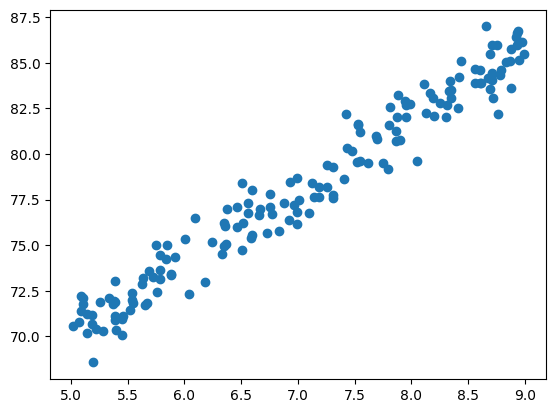

In [101]:
plt.scatter(X_train,y_train)  

In [102]:
lr.predict(X_train)

array([77.68264593, 81.08485404, 76.27483567, 76.93963496, 80.92843068,
       75.45361302, 82.8837227 , 72.87262756, 83.11835774, 70.44806545,
       83.19656942, 73.26368596, 81.35859492, 73.77206189, 77.09605832,
       71.62124067, 85.34739064, 71.50392314, 75.88377727, 73.14636844,
       81.71054748, 84.25242711, 84.52616799, 82.33624093, 72.28603995,
       84.68259135, 73.1072626 , 83.54852198, 74.43686117, 77.97964977,
       84.87812056, 85.54291984, 82.64908765, 81.16306572, 84.09600375,
       70.52627714, 81.35859492, 73.45921516, 70.72180634, 82.53177013,
       72.63799252, 77.01784664, 84.68259135, 74.12401445, 79.67704378,
       75.88377727, 81.71054748, 85.77755488, 79.5988321 , 78.54297441,
       72.28603995, 84.29153295, 73.26368596, 79.87257299, 71.93408739,
       75.49271886, 76.11841231, 79.63793794, 85.3082848 , 85.58202568,
       78.46476273, 84.25242711, 76.07930647, 71.97319323, 84.68259135,
       83.2747811 , 71.69945235, 84.60437967, 79.0122445 , 70.91

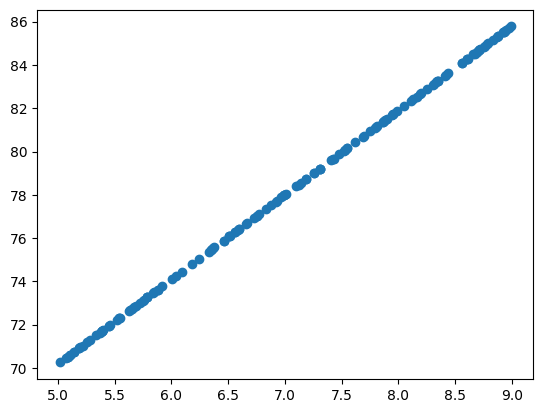

In [103]:
plt.scatter(X_train, lr.predict(X_train))

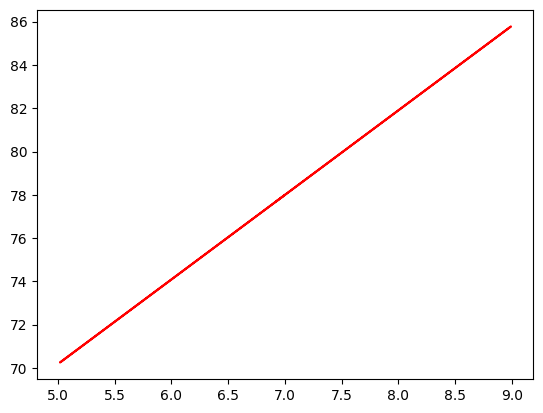

In [104]:
plt.plot(X_train, lr.predict(X_train), 'r-')

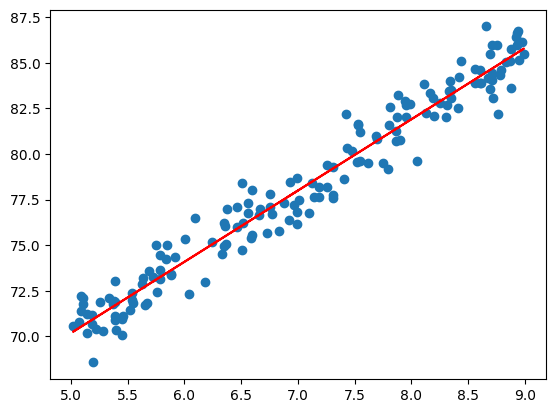

In [105]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

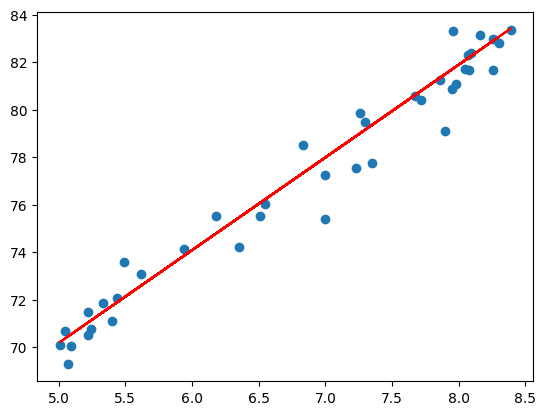

In [106]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

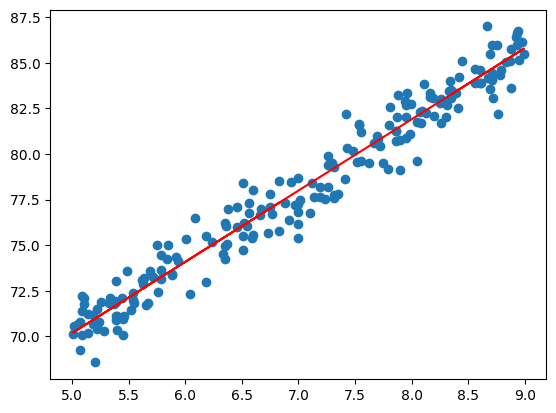

In [107]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")